In [1]:
bulk=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.bulk_2021-03-23.csv',
              sep=',',header=TRUE,row.names=1)
head(bulk)

,SAMD11,HES4,ISG15,ERRFI1,ENO1,EFHD2,EPHA2,UBR4,CAMK2N1,CDA,⋯,GTSE1,CTA.29F11.1,CCT8,EVA1C,CBR3,TFF1,PDXK,MT.ND1,MT.ATP6,MT.ND6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A130V,0.1221154,0.05105852,0.032141395,0.05120942,-0.011451470,0.010341977,-0.04951835,-0.04942619,0.01587337,0.051889479,⋯,0.04000793,-0.08421181,0.03709780,-0.14854762,-0.01503841,-0.1503158,0.1960897,0.11794385,-0.04992799,-0.03512640
A146P,-0.2524619,-0.21373807,-0.020436123,-0.05072645,0.061791226,-0.219071254,0.17735830,0.01400890,-0.17891257,-0.201358378,⋯,-0.03567664,-0.02913276,0.07754449,0.11870397,-0.09914483,0.3599360,-0.4076708,-0.04755245,0.01609150,0.05547064
A146T,-0.3093184,-0.24698596,-0.075634256,-0.05035703,-0.031042954,-0.251157075,0.14983034,-0.04626026,-0.11612704,-0.204853117,⋯,-0.07596385,-0.07097843,0.06576167,0.09005298,-0.08483756,0.3739569,-0.4463715,-0.10298548,0.06396449,0.08175519
A146V,-0.1975946,-0.20085196,-0.062803678,-0.03021017,-0.056985799,-0.226720169,0.06755126,0.01401105,-0.04504472,-0.113385662,⋯,-0.08900470,0.01380466,0.06565074,0.07979345,-0.01228457,0.2555923,-0.3384105,-0.03475608,0.05410769,0.07157926
A155G,0.1485217,-0.01425435,-0.023883244,0.02304890,0.005353708,-0.008820116,-0.16747969,-0.01936297,0.04483458,-0.001277659,⋯,-0.03644457,0.02430475,0.02565107,-0.11620820,0.05592566,-0.1379004,0.1706902,0.17553607,-0.01860078,0.01587470
A59E,-0.1945801,-0.10993996,-0.005963203,0.05395488,-0.013587371,-0.041117933,0.07238775,0.02402490,0.00985309,-0.089937419,⋯,-0.07323426,0.02842703,0.02851263,0.05779123,-0.06575617,0.1529978,-0.1861191,-0.09257947,0.12294953,0.02361535


In [2]:
length(rownames(bulk))

[1] 99

In [3]:
rownames(bulk)

[1] "A130V"      "A146P"      "A146T"      "A146V"      "A155G"     
 [6] "A59E"       "A59G"       "A59T"       "A66A"       "AG11TD"    
[11] "AG59GV"     "C118S"      "C185Y"      "D119G"      "D173D"     
[16] "D30D"       "D33E"       "D57N"       "E31K"       "E63K"      
[21] "F141L"      "G12A"       "G12C"       "G12D"       "G12F"      
[26] "G12I"       "G12R"       "G12S"       "G12V"       "G12Y"      
[31] "G13C"       "G13E"       "G13R"       "G13V"       "G60D"      
[36] "G60S"       "G60V"       "G75A"       "G77A"       "I163S"     
[41] "I36M"       "K117N"      "K117R"      "K147N"      "K147T"     
[46] "K169K"      "K176Q"      "K178K"      "K179R"      "K5E"       
[51] "K88K"       "L159S"      "L19F"       "L52F"       "L79I"      
[56] "M111L"      "M170L"      "N26Y"       "P110S"      "P34L"      
[61] "P34R"       "Q22H"       "Q22K"       "Q25H"       "Q61A"      
[66] "Q61H"       "Q61K"       "Q61L"       "Q61P"       "Q61R"      
[71] "Q99E"       "R135T"      "R149K"      "R164Q"      "R41K"      
[76] "R68S"       "S136N"      "S17S"       "T127T"      "T144P"     
[81] "T144T"      "T158A"      "T158T"      "T20M"       "T20R"      
[86] "T20T"       "T50I"       "T50P"       "T50T"       "T58I"      
[91] "T74A"       "T74T"       "V112I"      "V14I"       "V14L"      
[96] "V8V"        "WT"         "Y166H"      "unassigned"

In [4]:
scores_init=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/scoring/scores/scores.iter0.cells1000.cells.csv',
                 sep=',',header=TRUE,row.names=1)
print(head(scores_init))
scores_init=scores_init[rownames(bulk),]
scores=data.frame(score=as.numeric(as.character(scores_init[,'HotellingT2.mean'])))
rownames(scores)=rownames(scores_init)
colnames(scores)='score'
head(scores)

      avg.pearson.mean avg.pearson.ci.0.95.low avg.pearson.ci.0.95.high
G60V         1.2534558               1.2372288                1.2696829
K169K        0.2128316               0.1966339                0.2290294
R135T        0.2082394               0.1912731                0.2252056
G12R         1.8268445               1.8155571                1.8381318
Q61R         1.8263556               1.8128476                1.8398635
Y166H        0.2323604               0.2177806                0.2469402
      avg.pearson.q HotellingT2.mean HotellingT2.ci.0.95.low
G60V      0.0000100       1150.30656              1095.86949
K169K     0.6520894         36.59880                29.90393
R135T     0.6701218         49.66775                41.79004
G12R      0.0000100       6506.51915              6277.83310
Q61R      0.0000100       9063.81254              8729.79018
Y166H     0.5348450         35.44185                28.34015
      HotellingT2.ci.0.95.high HotellingT2.q
G60V                1204

,score
,<dbl>
A130V,39.35288
A146P,6163.18280
A146T,7566.46983
A146V,4877.07517
A155G,40.77805
A59E,3230.23328


In [5]:
scores['T74T',]

[1] 43.19769

In [6]:
bulk_corr=cor(t(bulk),method='spearman')

In [7]:
x=bulk_corr
hc <- hclust(dist(x,method='manhattan'),method='complete')

In [8]:
options(repr.plot.width=20, repr.plot.height=4)

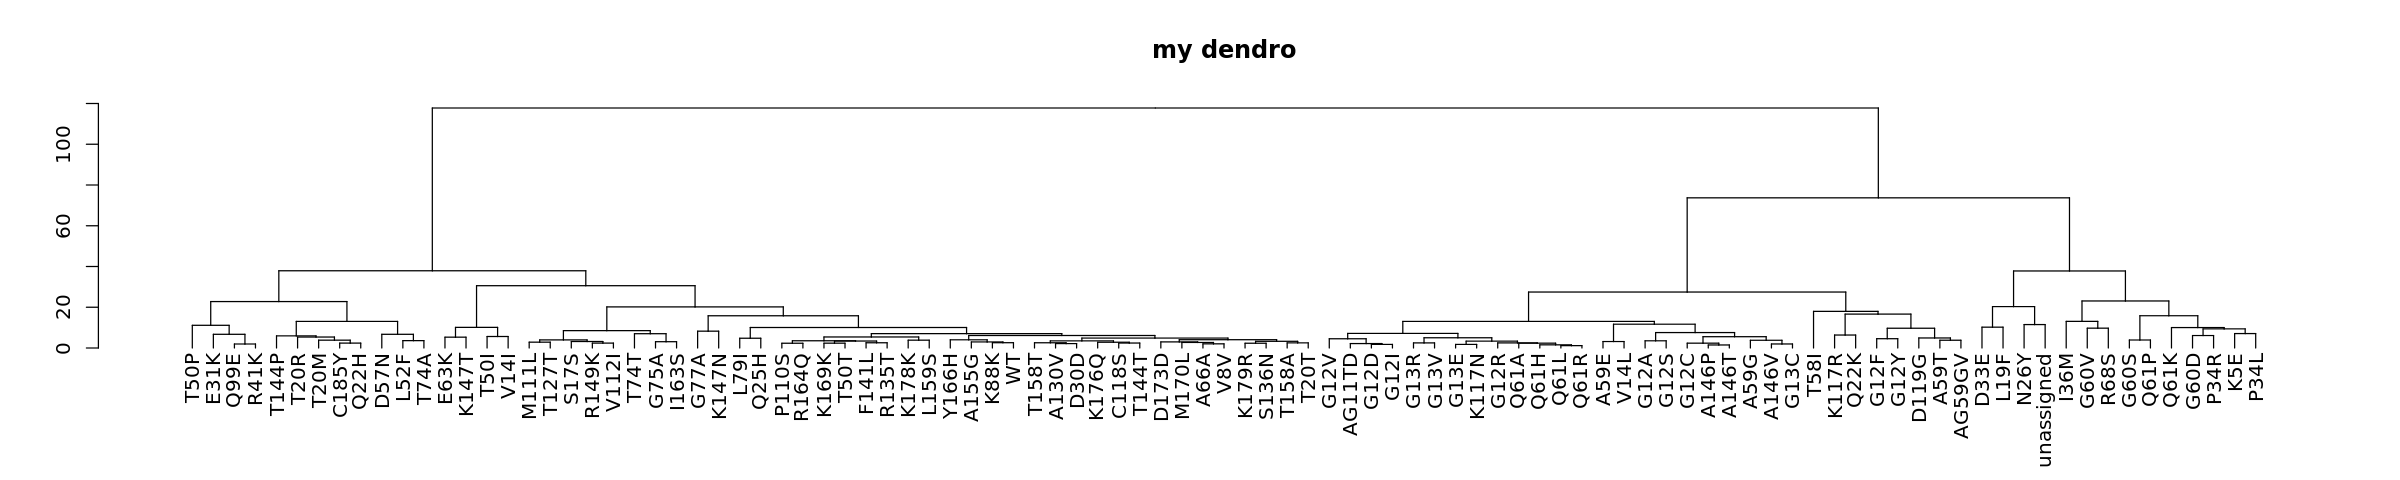

In [9]:
dd <- as.dendrogram(hc)
plot(dd, main = "my dendro")

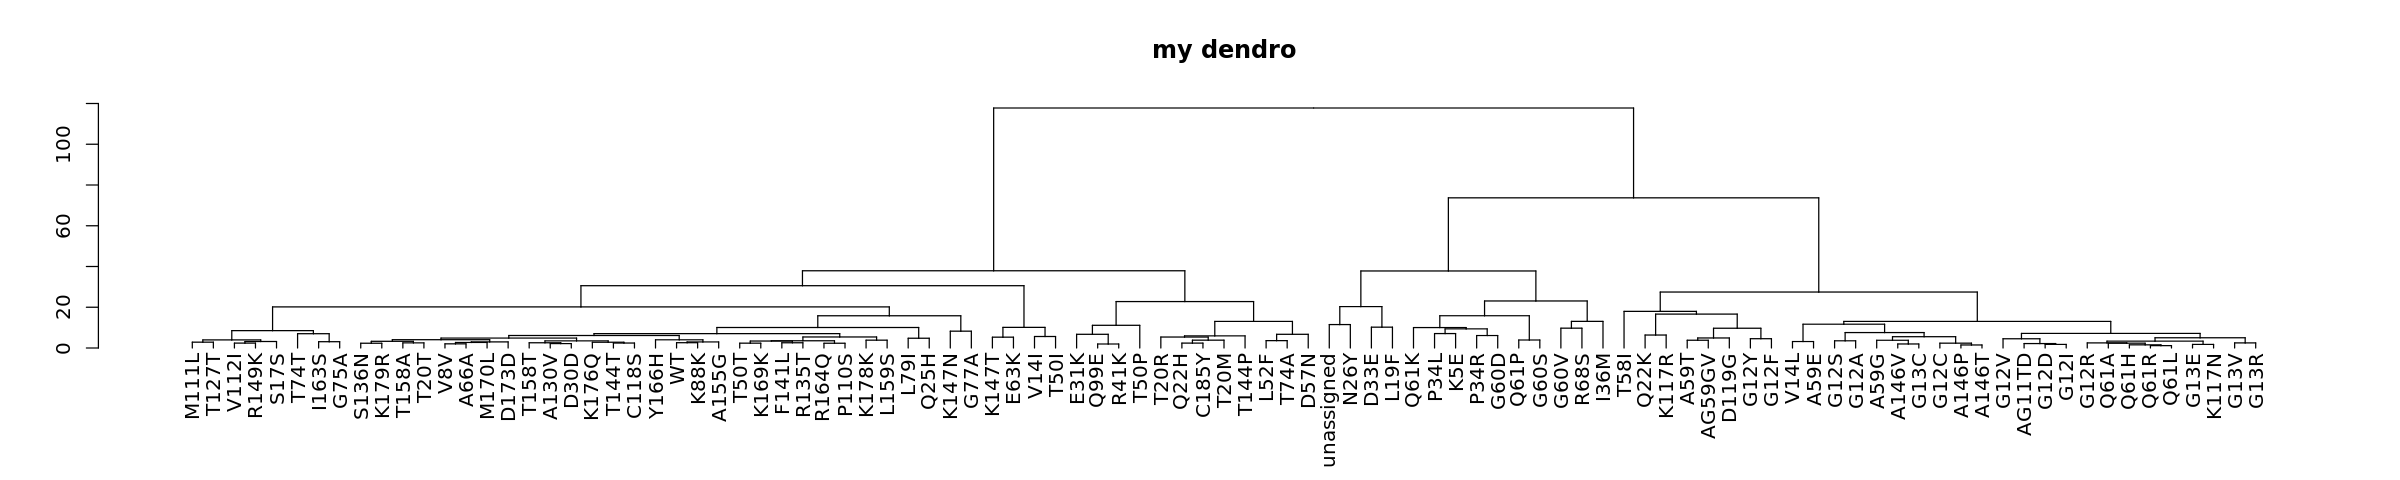

In [10]:
dd.reorder <- reorder(dd, wts=scores[rownames(x),'score'],agglo.FUN = mean)
plot(dd.reorder, main = "my dendro")

In [11]:
require(dendextend)

Loading required package: dendextend


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




In [12]:
dend <- color_branches(dd.reorder, k=3) 

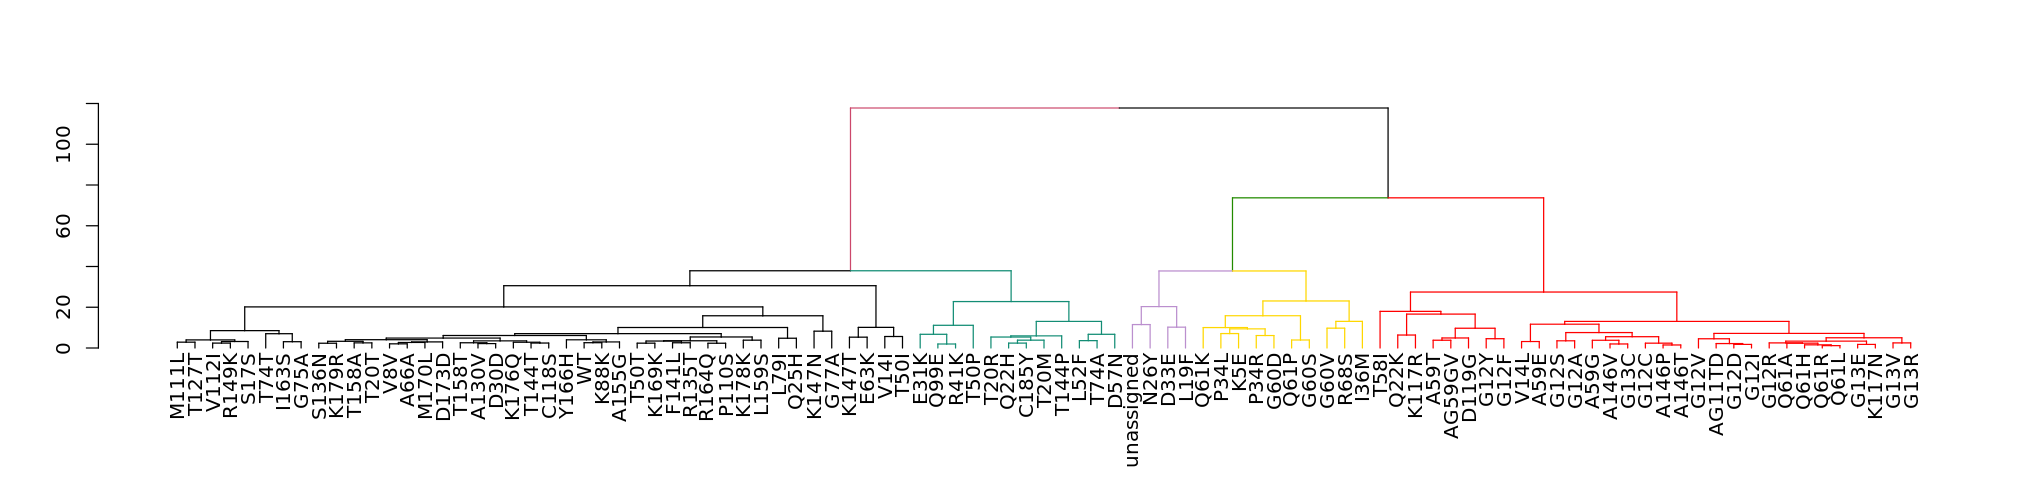

In [13]:
options(repr.plot.width=17, repr.plot.height=4)
d1 <- color_branches(dend, 5, col = c('black','#138D75','#BB8FCE','gold','red'))
plot(d1)

In [14]:
options(repr.plot.width=17, repr.plot.height=4)
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/KRAS'
pdf(paste(f_pref,'.dendrogram.pdf',sep=''),width=20,height=5)
d1 <- color_branches(dend, 5, col = c('black','#138D75','#BB8FCE','gold','red'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.pdf',sep=''))

NULL


png 
  2

[1] "/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/KRAS.dendrogram.pdf"


In [15]:
par('mar')
par(mar=c(1,1,1,1))

[1] 5.1 4.1 4.1 2.1

In [16]:
dev.off()
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/KRAS'
png(paste(f_pref,'.dendrogram.png',sep=''),width=20,height=5)
d1 <- color_branches(dend, 5, col = c('black','#138D75','#BB8FCE','gold','red'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.png',sep=''))

null device 
          1

ERROR: Error in plot.new(): figure margins too large


In [17]:
png()
dev.off()

png 
  2

In [18]:
sorted_variants=rownames(x)[order.dendrogram(dend)]
sorted_variants_df=data.frame(variant=sorted_variants,
                              color=get_leaves_branches_col(d1))

In [19]:
res='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/KRAS/clustering/KRAS.corrL1.sorted_variants_2021-03-23.csv'
write.table(sorted_variants_df,res,sep=',',quote=FALSE,row.names=FALSE,col.names=FALSE)